In [1]:
from scipy.stats import ttest_rel
import pandas as pd

def compare_models_ttest(csv_model1, csv_model2, metric="RMSE"):
    """
    Compara dos modelos usando t-test pareado sobre los folds.
    """
    df1 = pd.read_csv(csv_model1)
    df2 = pd.read_csv(csv_model2)

    if metric not in df1.columns or metric not in df2.columns:
        raise ValueError(f"La métrica '{metric}' no está en los CSV.")

    v1 = df1[metric]
    v2 = df2[metric]

    t_stat, p_value = ttest_rel(v1, v2)

    print("Comparación t-test pareado")
    print(f"Métrica: {metric}")
    print(f"Modelo 1 media: {v1.mean():.6f}")
    print(f"Modelo 2 media: {v2.mean():.6f}")
    print(f"T-statistic: {t_stat:.6f}")
    print(f"P-value: {p_value:.10f}")

    if p_value < 0.05:
        print("→ Diferencia significativa (p < 0.05)")
    else:
        print("→ No hay diferencia significativa (p ≥ 0.05)")

    return t_stat, p_value


In [5]:
compare_models_ttest("resultados/base.csv", "resultados/enriquecido.csv")

Comparación t-test pareado
Métrica: RMSE
Modelo 1 media: 0.142376
Modelo 2 media: 0.149399
T-statistic: -2.905261
P-value: 0.0174452939
→ Diferencia significativa (p < 0.05)


(np.float64(-2.9052614300297677), np.float64(0.017445293946282723))

In [6]:
compare_models_ttest("resultados/enriquecido.csv", "resultados/enriquecido_optimizado.csv")

Comparación t-test pareado
Métrica: RMSE
Modelo 1 media: 0.149399
Modelo 2 media: 0.147970
T-statistic: 2.866191
P-value: 0.0185917930
→ Diferencia significativa (p < 0.05)


(np.float64(2.866190549110105), np.float64(0.018591793043017325))

In [7]:
compare_models_ttest("resultados/base.csv", "resultados/enriquecido_optimizado.csv")

Comparación t-test pareado
Métrica: RMSE
Modelo 1 media: 0.142376
Modelo 2 media: 0.147970
T-statistic: -2.433442
P-value: 0.0377687070
→ Diferencia significativa (p < 0.05)


(np.float64(-2.433442360142106), np.float64(0.03776870695600342))

In [2]:
compare_models_ttest("resultados/base.csv", "resultados/enriquecido_optimizado.csv")

Comparación t-test pareado
Métrica: RMSE
Modelo 1 media: 0.142376
Modelo 2 media: 0.147970
T-statistic: -2.433442
P-value: 0.0377687070
→ Diferencia significativa (p < 0.05)


(np.float64(-2.433442360142106), np.float64(0.03776870695600342))

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_rmse_comparison(csv_files, labels, column:str = "RMSE"):
    """
    Grafica un diagrama de barras con el RMSE promedio de varios modelos.
    
    csv_files: lista de rutas a CSVs (cada uno con columna 'rmse')
    labels: nombres de los modelos en el mismo orden
    """
    rmse_means = []

    for path in csv_files:
        df = pd.read_csv(path)
        rmse_means.append(df[column].mean())

    plt.figure(figsize=(7, 4))
    plt.bar(labels, rmse_means)
    plt.ylabel("RMSE promedio")
    # plt.xlabel("Modelo")
    plt.title("Comparación de RMSE entre modelos")
    plt.grid(axis="y", linestyle="--", alpha=0.5)
    plt.show()


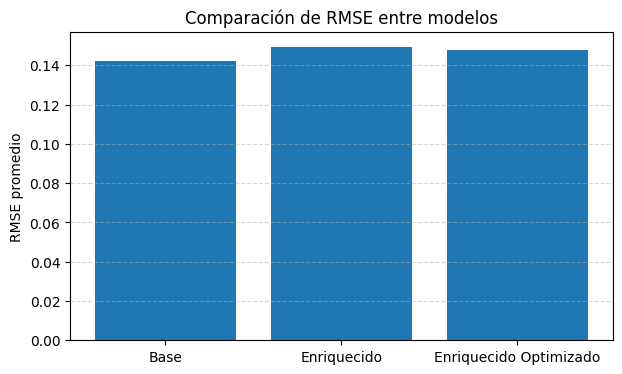

In [9]:
plot_rmse_comparison(["resultados/base.csv", "resultados/enriquecido.csv", "resultados/enriquecido_optimizado.csv"], ["Base", "Enriquecido", "Enriquecido Optimizado"])